In [100]:
# . fitness function ----

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi in zip(abs(x)):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xi[0]) ** 2
            # print('output:{} real:{}'.format(output[0],xi[0]))


# . neat run ----

def run(config_file, n = None):
    # load configuration
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                       neat.DefaultSpeciesSet, neat.DefaultStagnation,
                       config_file)
    # create the population, which is the top-level object for a NEAT run
    p = neat.Population(config)
    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(True)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    checkpointer = neat.Checkpointer(1)
    p.add_reporter(checkpointer)
    # run for up to n generations
    winner = p.run(eval_genomes, n)
    return [reporter, stats, winner]

In [137]:
### ENVIRONMENT ====

### . packages ----

import os
import neat

import numpy as np
import matplotlib.pyplot as plt
import random


### . sample data ----

x = np.sin(np.arange(.01, 4000 * .01, .01))


### NEAT ALGORITHM ====

### . model evolution ----

random.seed(1899)
[reporter, stats, winner] = run('config-feedforward', n = 25)


### . prediction ----

## extract winning model
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     'config-feedforward')

winner_net = neat.nn.FeedForwardNetwork.create(winner, config)



 ****** Running generation 0 ****** 

Population's average fitness: -1222.88507 stdev: 623.19884
Best fitness: -63.94908 - size: (1, 1) - species 1 - id 69
Average adjusted fitness: 0.481
Mean genetic distance 1.279, standard deviation 0.558
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   100    -63.9    0.481     0
Total extinctions: 0
Generation time: 2.033 sec
Saving checkpoint to neat-checkpoint-0

 ****** Running generation 1 ****** 

Population's average fitness: -1459.81007 stdev: 1003.45869
Best fitness: -55.42576 - size: (1, 1) - species 1 - id 178
Average adjusted fitness: 0.829
Mean genetic distance 1.462, standard deviation 0.572
Population of 100 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   100    -55.4    0.829     0
Total extinctions: 0
Generation time: 1.507 sec (1.770 average)
Saving checkpoint to neat-che

Population's average fitness: -2344.81722 stdev: 3474.84285
Best fitness: 3.82381 - size: (1, 1) - species 1 - id 391
Average adjusted fitness: 0.916
Mean genetic distance 1.890, standard deviation 0.566
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   15    40      3.8    0.945    12
     2   10    29    -77.9    0.916     0
     3    6    31   -358.6    0.887     0
Total extinctions: 0
Generation time: 2.671 sec (1.920 average)
Saving checkpoint to neat-checkpoint-15

 ****** Running generation 16 ****** 

Population's average fitness: -3198.20557 stdev: 10938.47039
Best fitness: 3.82381 - size: (1, 1) - species 1 - id 391
Average adjusted fitness: 0.965
Mean genetic distance 1.802, standard deviation 0.639
Population of 100 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1   16    42      3.8    0.984    13
     2   11    26    -77.9    0

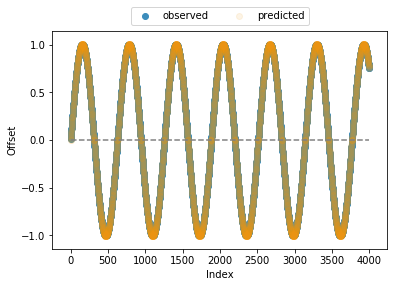

In [138]:
## make predictions
y = []
for xi in zip(abs(x)):
  y.append(winner_net.activate(xi))

## if required, adjust signs
for i in range(len(y)):
  if (x[i] < 0):
    y[i] = [x * -1 for x in y[i]]

## display sample vs. predicted data
plt.scatter(range(len(x)), x, color='#3c8dbc', label = 'observed') # blue
plt.scatter(range(len(x)), y, color='#f39c12', label = 'predicted', alpha = 0.1) # orange
plt.hlines(0, xmin = 0, xmax = len(x), colors = 'grey', linestyles = 'dashed')
plt.xlabel("Index")
plt.ylabel("Offset")
plt.legend(bbox_to_anchor = (0., 1.02, 1., .102), loc = 10, ncol = 2, mode = None, borderaxespad = 0.)
plt.show()
plt.clf()

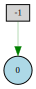

In [139]:
import visualize
visualize.draw_net(config, winner, False,fmt="png")

In [140]:
winner

In [154]:
for i in range(25):
    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(i))
    #print(p.population[list(p.population)[0]])

<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeciesSet object at 0x107fca048>>
<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeciesSet object at 0x10eac77b8>>
<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeciesSet object at 0x10e857be0>>
<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeciesSet object at 0x10e4d1198>>
<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeciesSet object at 0x10e861ac8>>
<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeciesSet object at 0x10e8c6780>>
<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeciesSet object at 0x10e828c50>>
<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeciesSet object at 0x10e4d1e48>>
<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeciesSet object at 0x10eada630>>
<bound method DefaultSpeciesSet.get_species of <neat.species.DefaultSpeci

In [150]:
p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-'+str(0))
#print(p.population)

#winnerp = p.run(eval_genomes, 0)
#print("\nBest genome:\n{!s}".format(winnerp))

69

In [112]:
p.best_genome

In [106]:
print(p.population[69])

Key: 69
Fitness: -63.94908175495046
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.3075434015636279, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-1, 0), weight=0.9401166016557478, enabled=True)


None
None
None
None
None


In [99]:
print(stats.best_genome())

Key: 391
Fitness: 3.8238120765956145
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.015392585093011876, response=1.0, activation=relu, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-1, 0), weight=1.0211169825669357, enabled=True)


In [62]:
print("\nBest genome:\n{!s}".format(p.run(eval_genomes, 0)))


Best genome:
None


Mean genetic distance 1.807, standard deviation 0.603
Mean genetic distance 1.896, standard deviation 0.609
Mean genetic distance 1.887, standard deviation 0.563
Mean genetic distance 1.873, standard deviation 0.601
Mean genetic distance 1.868, standard deviation 0.622


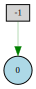

In [23]:
import visualize
visualize.draw_net(config, p.run(eval_genomes, 5), True,fmt="png")